In [1]:
from src.database import DatabaseXRD,snip,Phase,MixPhase
from src.gaussnewton import GaussNewton
from numpy import newaxis,loadtxt,diag,histogram,arange,linspace,sin,concatenate,array,exp,pi,zeros,ones,prod,newaxis,arctan,savetxt,c_,fabs,sqrt,concatenate
from numpy.random import normal
from numpy.linalg import pinv,inv
from scipy.optimize import curve_fit,least_squares
from scipy.interpolate import interp1d
from scipy.signal import find_peaks

from matplotlib.pyplot import plot,show,vlines,xlim,ylim,figure,semilogx,scatter,xlabel,ylabel,subplots,gca

from glob import glob

from scipy import signal
from numpy import fft,pad,concatenate,stack

from src.spectra import Spectra

In [2]:
database = DatabaseXRD().read_cifs('Database/')

calcite = database['Calcite'][0]
hydrocerussite = database['Hydrocerussite'][0]
cinnabar = database['Cinnabar'][2]
spinel = database['Spinel'][0]
barite = database['Barite'][0]

In [3]:
def fce_calibration(x,a,beta,s):
    return (arctan((x+a)/s)) * 180 / pi + beta

In [4]:
files = glob('Cappello/Spinel_Barite/roi*.dat')
cnb_hcs = MixPhase([spinel,barite])

xrd_gn = []
xrd_spectra = []

for file in files:
    
    spectra = Spectra(file)
    spectra.calibrate_from_file('Cappello/Calibrazione1.txt').convolve(1).snip()
    
    xrd_spectra += [spectra]
    xrd_gn += [GaussNewton(cnb_hcs,spectra)]

In [5]:
all_spinel = database['Spinel']
all_barite = database['Barite']
sb = []
for spinel in all_spinel:
    for barite in all_barite:
        sb += [MixPhase([spinel,barite])]
print('N mixtures:',len(sb))

gn = []
for phase in sb:
    gn += [GaussNewton(phase,xrd_spectra[0])]
    
for g in gn[:]:
    for _ in range(64):
        g.calibration(alpha=1)
        g.opt = g.spectra.opt.copy()
    print(g.spectra.opt)
    
    opt = g.spectra.opt
    opt_file = g.spectra.opt_file
    
    y_new = fce_calibration(x,*opt)
    y_old = fce_calibration(x,*opt_file)
    
    plot(y_new-y_old)
    xlim(0,1280)

N mixtures: 102
[-1410.04773774    58.74246905  1770.33948876]


NameError: name 'x' is not defined

NameError: name 'gn' is not defined

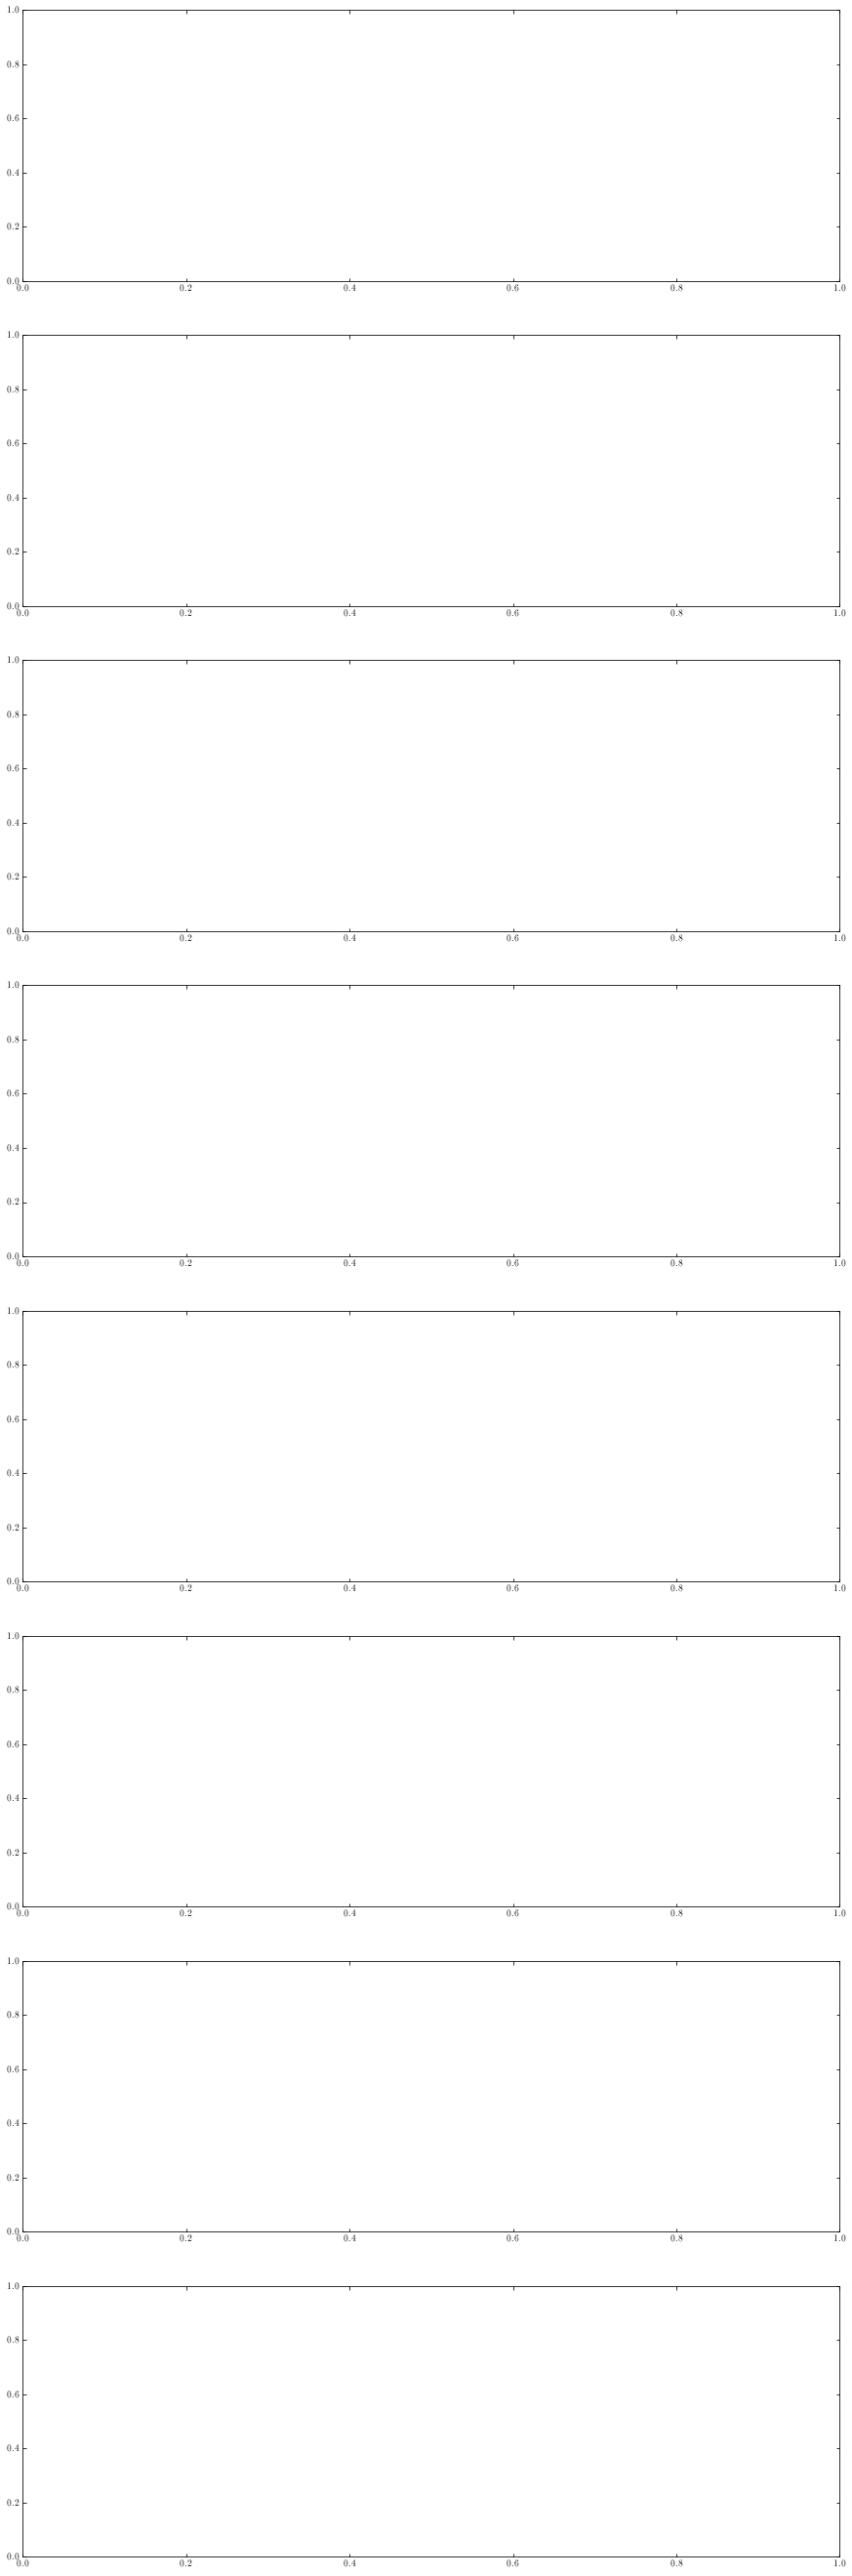

In [20]:
%matplotlib inline
fig,ax = subplots(8,1,figsize = (15,48))

for i,g in enumerate(gn[-8:]):
    
    g.spectra.opt = g.opt.copy()
    
    ax[i].vlines(g.mu,0,g.i,'r',alpha=0.5,ls='--',lw=3)
    ax[i].plot(g.theta,g.z,'-',lw=2)
    ax[i].plot(s.theta,s.intensity,'-.')
    ax[i].vlines(g.mu,0,1,'k',alpha=0.33,ls='--',lw=1)
    
    ax[i].vlines(g.mu[g.gamma<0],0,1,'c',alpha=1,ls='--',lw=3)
    
    ax[i].set_xlim(19,54)
    ax[i].set_ylim(0,1)

[ 0.91567069  1.0987859   2.51505379  0.00652368  0.14175917  0.31002405
  1.39801687  0.52365596  0.44288295  0.67538509  0.41727145  0.44192676
  2.34504235  0.02122266  3.20329035  0.72687295  2.07728605  1.50449419
  0.54265444  1.21372242  1.         -2.17330052  3.62169567  1.2574772
  2.24400127  1.37116122  2.30787729  1.22318442]


(19.0, 53.0)

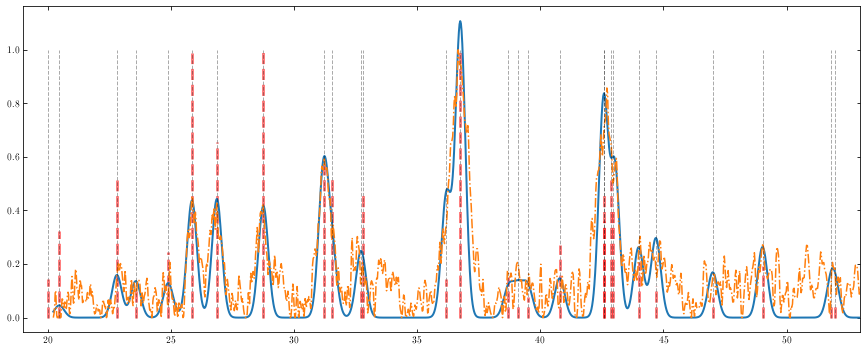

In [19]:
g = xrd_gn[0]
s = xrd_spectra[0]

for _ in range(32):
    g.calibration(alpha=1)  
print(g.gamma)

figure(figsize=(15,6))

vlines(g.mu,0,g.i,'r',alpha=0.5,ls='--',lw=3)
plot(g.theta,g.z,'-',lw=2)
plot(s.theta,s.intensity,'-.')
vlines(g.mu,0,1,'k',alpha=0.33,ls='--',lw=1)

xlim(19,53)
#ylim(0,1)

[-1414.95351982    58.93735583  1764.69808033]
[-1304.45434208    54.46795923  1899.63415402]
[-1324.15659957    55.37892192  1865.34803941]
[-1320.66939368    55.17766279  1872.69515714]
[-1318.12227206    54.95571833  1885.11038833]
[-1302.17053474    54.53681491  1891.60135519]


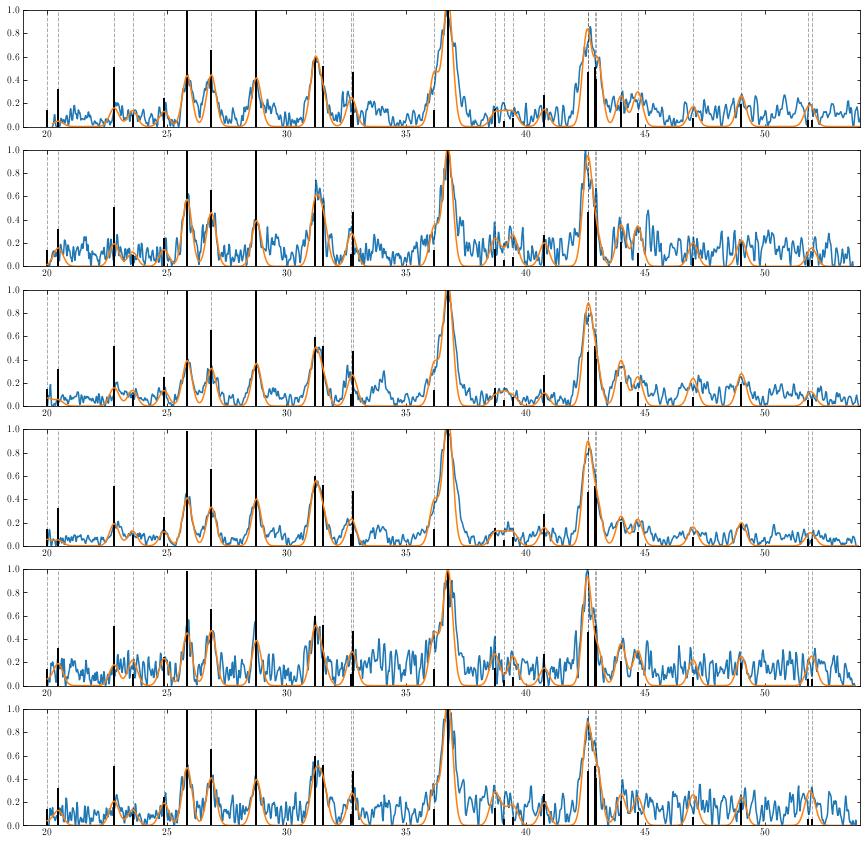

In [27]:
%matplotlib inline
fig,ax = subplots(len(xrd_spectra),1,figsize = (15,15))

for i,(spectra,gn) in enumerate(zip(xrd_spectra,xrd_gn)):
    
    for _ in range(16):
        gn.calibration(alpha=0.5)
    print(gn.spectra.opt)
    
    ax[i].plot(spectra.theta,spectra.intensity)
    
    x,y = cnb_hcs.get_theta(max_theta = 53,min_intensity=0.05)
    ax[i].vlines(x,0,y,'k',lw=2)
    ax[i].vlines(x,0,1.0,'k',lw=1,ls='--',alpha=0.33)
        
    ax[i].plot(gn.theta,gn.z)
    
    ax[i].set_xlim(19,54)
    ax[i].set_ylim(0,1)

[-1414.95351982    58.93735583  1764.69808033] [-1214.71937795    51.66346478  1952.71389334]
[-1304.10769707    54.45580758  1899.95212501] [-1214.71937795    51.66346478  1952.71389334]
[-1316.22947032    55.09766236  1872.95556215] [-1214.71937795    51.66346478  1952.71389334]
[-1310.58316506    54.82885191  1881.61610039] [-1214.71937795    51.66346478  1952.71389334]
[-1317.79479929    54.95097793  1884.85276177] [-1214.71937795    51.66346478  1952.71389334]
[-1298.53286078    54.40064533  1895.64443235] [-1214.71937795    51.66346478  1952.71389334]


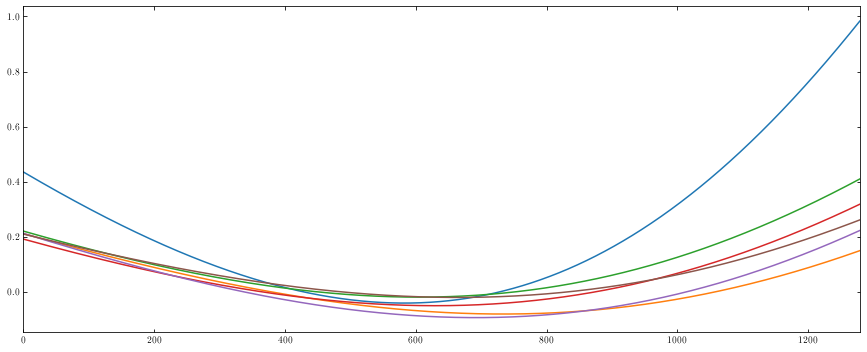

In [23]:
#fig,ax = subplots(len(xrd_spectra),1,figsize = (15,15))
figure(figsize=(15,6))

x = arange(0,1280)
for i,gn in enumerate(xrd_gn):
    opt = gn.spectra.opt
    opt_file = gn.spectra.opt_file
    print(opt,opt_file)
    
    y_new = fce_calibration(x,*opt)
    y_old = fce_calibration(x,*opt_file)
    
    plot(y_new-y_old)
    xlim(0,1280)
